
# EOSC 213 — Python Workshop II
**Live coding notebook**

**Goal:** Get comfortable with Python basics + PyTorch tensors.

## What you'll practice
- variables, types, printing, formatting
- lists/tuples/dicts, indexing, slicing
- `if` / `for` / `while`, writing clean loops
- writing functions (with docstrings), returning multiple values
- PyTorch tensors: creation, shapes, dtypes, device, indexing
- basic tensor ops: arithmetic, broadcasting, reductions
- saving/loading tensors and simple tabular data (CSV)
- debugging habits: reading errors, inspecting shapes

> **Live-coding rule:** type along. After each “✅ Checkpoint”, stop and verify outputs.


## 0) Setup (import libraries)

In [1]:

import torch
import math
import time
import matplotlib.pyplot as plt


## 1) Python basics

### 1.1 Variables, types, and printing


In [2]:
a = 3
b = 3.0
c = "hello"
d = True

print(type(a), a)
print(type(b), b)
print(type(c), c)
print(type(d), d)

# Useful: f-strings (clean formatting)
x = 1.234567
print(f"x = {x:.3f}")   # 3 decimal places


<class 'int'> 3
<class 'float'> 3.0
<class 'str'> hello
<class 'bool'> True
x = 1.235



### ✅ Checkpoint 1
Create variables:
- `name` (string)
- `age` (int)

Print one sentence using an f-string.


In [3]:
# TODO: write your code here



### 1.2 Lists and indexing
Lists are ordered, mutable containers.


In [4]:

nums = [10, 20, 30, 40, 50]
print(nums[0], nums[-1])     # first and last
print(nums[1:4])             # slice: indices 1,2,3
nums.append(60)
nums[2] = 999
print(nums)


10 50
[20, 30, 40]
[10, 20, 999, 40, 50, 60]



### ✅ Checkpoint 2
Given `vals = [2, 4, 6, 8, 10]`:
1) print the middle three values using slicing  
2) replace the last value with `100`  
3) append `-1`


In [5]:
# TODO



### 1.3 Dictionaries (key → value)


In [6]:

student = {"name": "Anna", "id": 12345, "grades": [78, 82, 91]}
print(student["name"])
print("mean grade:", sum(student["grades"]) / len(student["grades"]))
student["grades"].append(88)
print(student)


Anna
mean grade: 83.66666666666667
{'name': 'Anna', 'id': 12345, 'grades': [78, 82, 91, 88]}



### ✅ Checkpoint 3
Make a dict called `geo` with keys:
- `"lat"` , `"lon"` (floats)
- `"rock"` (string)

Print a sentence summarizing it.


In [7]:
# TODO



## 2) Control flow: if / for / while


In [8]:

temp = 5.0
if temp < 0:
    print("freezing")
elif temp < 10:
    print("cold")
else:
    print("warm")


cold



### ✅ Checkpoint 4
Write code that prints:
- `"stable"` if `abs(g) < 1`
- `"unstable"` otherwise  

Test it for `g = 0.8`, `g = -0.9`, `g = 1.1`.


In [9]:
# TODO



### 2.2 `for` loops


In [10]:

s = 0
for k in range(1, 6):
    s += k
print("sum 1 to 5 =", s)


sum 1 to 5 = 15



### ✅ Checkpoint 5a
Compute the factorial of 8 using a `for` loop.  
(8! = 40320)


In [11]:
# TODO


### ✅ Checkpoint 5b
Write a `for` loop logic to create this structure of symbols. Use f-strings

```python
a-
b*b*
c-c-c-
d*d*d*d*
e-e-e-e-e-
f*f*f*f*f*f*
g-g-g-g-g-g-g-
h*h*h*h*h*h*h*h*
```


In [12]:
# TODO 



### 2.3 `while` loops


In [13]:

x = 1.0
steps = 0
while x > 1e-3:
    x /= 2
    steps += 1
print("steps:", steps, "final x:", x)


steps: 10 final x: 0.0009765625



### ✅ Checkpoint 6
Start with `x=1`. Repeatedly multiply by `0.9` until `x < 0.2`.  
Print how many steps it took.


In [14]:
# TODO



## 3) Functions


In [15]:

def triangle_area(base: float, height: float) -> float:
    """Return the area of a triangle."""
    return 0.5 * base * height

print(triangle_area(3.0, 4.0))


6.0



### ✅ Checkpoint 7
Write a function `rmse(a, b)` that computes root-mean-square error between two 1D PyTorch tensors.

The root-mean-square error (RMSE) between two 1D tensors $a$ and $b$ of length $n$ is:

$$
\mathrm{RMSE}(a, b) = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (a_i - b_i)^2 }
$$


In [16]:
# TODO



### 3.2 Returning multiple values


In [17]:

def mean_and_std(x: torch.Tensor):
    m = x.mean()
    s = x.std(unbiased=False)
    return m, s

x = torch.randn(1000)
m, s = mean_and_std(x)
print("mean:", m.item(), "std:", s.item())


mean: 0.02386999875307083 std: 1.0399662256240845



### ✅ Checkpoint 8a
Write `minmax(x)` that returns `(xmin, xmax)` as Python floats, where `x` is a random pytorch tensor.


In [18]:
# TODO


### ✅ Checkpoint 8b
Write a function that computes and returns the sum of values upto $N$ and the product of values upto $N$, where $N$ is a positive integer


In [19]:
# TODO


## 4) PyTorch tensors: creation, shapes, dtypes


In [3]:

a = torch.tensor([1.0, 2.0, 3.0])
b = torch.zeros(5)
c = torch.ones(2, 3)
d = torch.randn(4, 4)

print(a.shape, b.shape, c.shape, d.shape)
print(d.dtype)


torch.Size([3]) torch.Size([5]) torch.Size([2, 3]) torch.Size([4, 4])
torch.float32



### ✅ Checkpoint 9
Create:
- `z = torch.zeros(3, 4)`
- `r = torch.randn(3, 4)`

Print:
- `r.mean()` and `r.std()`
- the shape of `r`


In [21]:
# TODO



### 4.2 Indexing and slicing tensors


In [22]:

X = torch.arange(0, 24).reshape(2, 3, 4)
print("X shape:", X.shape)
print("X[0] shape:", X[0].shape)
print("X[0, 1, :]:", X[0, 1, :])
print("X[:, :, 0]:\n", X[:, :, 0])


X shape: torch.Size([2, 3, 4])
X[0] shape: torch.Size([3, 4])
X[0, 1, :]: tensor([4, 5, 6, 7])
X[:, :, 0]:
 tensor([[ 0,  4,  8],
        [12, 16, 20]])



### ✅ Checkpoint 10a
Let `A = torch.randn(3, 4, 5)`. Print:
1) `A[2, :, :]` shape  
2) `A[:, 1, :]` shape  
3) the scalar `A[0, 0, 0]` as a Python float  


In [23]:
# TODO


### ✅ Checkpoint 10b
Let `B = torch.randn(5,5)`

Create a binary mask `M` with the same shape as `B` where the center 3 x 3 block contains all 1s  
Find the mean of all the elements in `B` which lie within the 1s window in `M`



In [24]:
# TODO 


## 5) Tensor operations: broadcasting and reductions


In [25]:

x = torch.randn(4)
y = torch.randn(4)
print("dot:", torch.dot(x, y).item())
print("L2 norm:", torch.norm(x).item())


dot: 0.897813081741333
L2 norm: 1.6476680040359497



### 5.2 Broadcasting intuition


In [26]:

A = torch.randn(3, 4)
b = torch.randn(4)       # shape (4,)
C = A + b                # b broadcast to (3,4)
print(A.shape, b.shape, C.shape)


torch.Size([3, 4]) torch.Size([4]) torch.Size([3, 4])



### ✅ Checkpoint 11a (2D + 1D broadcasting)
Create `A = torch.randn(5, 3)` and `b = torch.randn(5, 1)`.  
Compute `A + b` and confirm the shape is `(5, 3)`.

In [27]:
# TODO

### ✅ Checkpoint 11b (broadcasting with singleton dimensions)

`X = torch.randn(2, 4, 6)`

`y = torch.randn(1, 4, 1)`

Compute `Z = X * y`

In [28]:
# TODO 


### 5.3 Reductions


In [29]:

M = torch.randn(3, 4)
print("M.mean():", M.mean().item())
print("mean over rows (dim=1):", M.mean(dim=1))
print("max per column (dim=0):", M.max(dim=0).values)


M.mean(): -0.036892909556627274
mean over rows (dim=1): tensor([ 0.1145, -0.0980, -0.1272])
max per column (dim=0): tensor([ 0.4218,  2.2364, -0.1590,  2.3124])



### ✅ Checkpoint 12
For `M = torch.randn(4, 6)` compute:
- mean per row (dim=1)
- mean per column (dim=0)
- global max and its index (use `torch.argmax`)


In [30]:
# TODO



## 6) Mini-project: Forward Euler from scratch (tiny version)

We implement a simple Forward Euler solver and test it on:

$x' = -\lambda x,\quad x(0)=x_0$


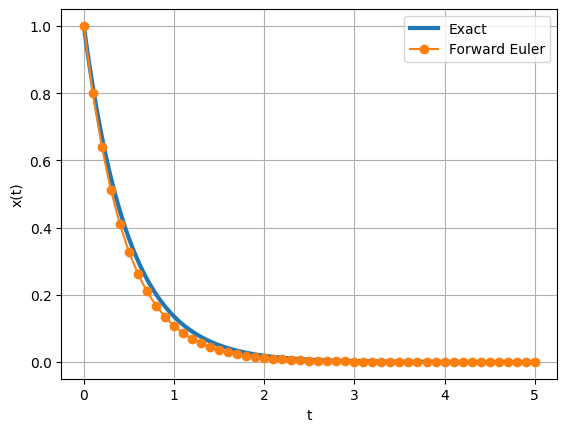

In [31]:

def forward_euler(f, t0, x0, h, N):
    '''
    Forward Euler for x' = f(t, x)
    Returns t (N+1,), x (N+1,)
    '''
    t = torch.zeros(N+1, dtype=torch.float32)
    x = torch.zeros(N+1, dtype=torch.float32)
    t[0] = t0
    x[0] = x0
    for n in range(N):
        t[n+1] = t[n] + h
        x[n+1] = x[n] + h * f(t[n], x[n])
    return t, x

lam = 2.0
f = lambda t, x: -lam * x
t, x = forward_euler(f, t0=0.0, x0=1.0, h=0.1, N=50)

# exact
t_fine = torch.linspace(0, t[-1].item(), 2000)
x_exact = torch.exp(-lam * t_fine)

plt.figure()
plt.plot(t_fine.numpy(), x_exact.numpy(), linewidth=3, label="Exact")
plt.plot(t.numpy(), x.numpy(), marker="o", label="Forward Euler")
plt.xlabel("t"); plt.ylabel("x(t)")
plt.grid(True); plt.legend(); plt.show()



### ✅ Checkpoint 13 (concept + code)
Try `h = 0.6` with `lam=2`.  
- Does it still decay?
- Do you see sign flips?

Then try `h = 1.2`.  
- What happens?


In [32]:
# TODO: do your experiments here



## 7) Loading / saving (so you can submit clean results)


In [33]:

A = torch.randn(3, 4)
torch.save(A, "demo_tensor.pt")
A2 = torch.load("demo_tensor.pt")
print("max abs diff:", (A - A2).abs().max().item())


max abs diff: 0.0



### 7.2 Simple CSV: write then read (no pandas required)
We'll store a 2-column table: t, x.


In [34]:

# Save to CSV
import pandas as pd

# Stack tensors into a 2D array (N+1, 2)
table = torch.stack([t, x], dim=1)

# Convert to pandas DataFrame
df = pd.DataFrame(table.numpy(), columns=["t", "x"])

# Save to CSV
df.to_csv("euler_decay.csv", index=False)



### ✅ Checkpoint 14
Change the filename to your own (e.g., `"my_decay.csv"`), write it, read it, and plot the loaded result.


In [35]:
# TODO



## 8) Debugging habits (quick)


In [36]:

# Habit: always print shapes when something fails
A = torch.randn(5, 3)
b = torch.randn(5)  # maybe you intended (5,1)
print("A:", A.shape, "b:", b.shape)

# Fix by reshaping
b2 = b.view(5, 1)
print("b2:", b2.shape, "A+b2:", (A + b2).shape)


A: torch.Size([5, 3]) b: torch.Size([5])
b2: torch.Size([5, 1]) A+b2: torch.Size([5, 3])
